In [5]:
import pdal
import hdbscan
import time
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from sklearn.cluster import DBSCAN
import pandas as pd

In [13]:
def dim_kde_full(arr, n=500, bw=0.25, k='epanechnikov'):
    xp = np.linspace(arr.min(), arr.max(), n)[:, np.newaxis]
    kde = KernelDensity(kernel=k, bandwidth=bw).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [372]:

json = u'''{
  "pipeline":[
    {
      "tag":"input",
      "type":"readers.pgpointcloud",
      "connection":"dbname='research'",
      "schema":"ahn3_pointcloud",
      "table":"vw_buildings",
      "column":"pa",
      "spatialreference":"EPSG:28992",
      //Polanenbuurt
      "where":"PC_Intersects(pa, ST_MakeEnvelope(93287.9,463710.2,93354.9,463780.7, 28992))"
      },
      {
      "type":"filters.range",
      "limits":"Slope[5:90]"
      }
    ]
}
'''
p = pdal.Pipeline(json)
p.validate()
count = p.execute()
data = p.arrays[0]
print('Dimension names are', data.dtype.names)
df = pd.DataFrame(data=data)
df['Aspect'] = np.rad2deg(df['Aspect'])
df['Aspect'] = np.where(df['Aspect']>0, df['Aspect']  , df['Aspect'] + 360)

Dimension names are ('X', 'Y', 'Z', 'Intensity', 'ReturnNumber', 'NumberOfReturns', 'ScanDirectionFlag', 'EdgeOfFlightLine', 'Classification', 'ScanAngleRank', 'UserData', 'PointSourceId', 'GpsTime', 'NormalX', 'NormalY', 'NormalZ', 'Curvature', 'Coplanar', 'Aspect', 'Slope')


,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,UserData,PointSourceId,GpsTime,NormalX,NormalY,NormalZ,Curvature,Coplanar,Aspect,Slope
0,93304.862,463720.621,10.913,148,1,1,0,0,6,-11.0,2,44350,225346.077524,-0.177831,0.021704,0.983822,0.024292,0,276.958475,10.320261
1,93304.956,463720.345,10.900,222,1,1,0,0,6,-11.0,2,44350,225346.082877,-0.423614,0.010126,0.905786,0.022843,0,271.369305,25.070626
2,93304.988,463719.512,10.990,134,1,1,0,0,6,-11.0,2,44350,225346.093579,-0.369574,-0.075940,0.926093,0.043430,0,258.388530,22.166251
3,93305.029,463718.672,11.046,87,1,1,0,0,6,-31.0,2,44351,225623.950399,-0.226705,-0.004783,0.973952,0.045705,0,268.791249,13.106134
4,93305.100,463719.257,10.945,106,1,1,0,0,6,-11.0,2,44350,225346.098931,0.031763,0.107229,0.993727,0.013717,0,16.500154,6.421075
5,93305.112,463720.094,10.908,235,1,1,0,0,6,-11.0,2,44350,225346.088229,-0.616114,-0.125215,0.777640,0.020538,0,258.512076,38.954962
6,93305.170,463720.602,10.912,188,1,1,0,0,6,-11.0,2,44350,225346.082879,-0.572312,-0.131025,0.809501,0.037180,0,257.104940,35.952789
7,93305.221,463718.968,10.899,203,1,1,0,0,6,-11.0,2,44350,225346.104284,0.065574,0.058058,0.996157,0.023235,0,48.479203,5.024494
8,93305.225,463720.648,6.120,190,1,1,0,0,6,-11.0,2,44350,225346.077519,-0.981976,-0.178480,0.062193,0.002231,1,259.698626,86.434329
9,93305.226,463719.791,10.903,174,1,1,0,0,6,-11.0,2,44350,225346.093582,-0.549153,-0.039882,0.834769,0.038606,0,265.846187,33.408169


Slopehisto


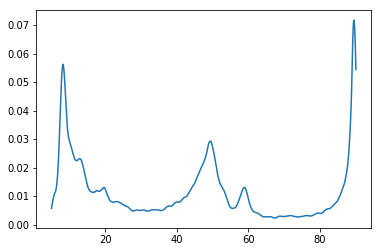

In [373]:
print('Slopehisto')
dim_kde_full(df['Slope'],bw=1.0)

Aspecthisto


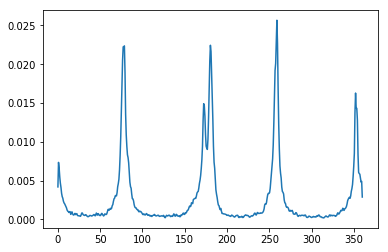

In [374]:
print('Aspecthisto')
dim_kde_full(df['Aspect'],bw=1.0)

In [385]:
from scipy import signal
bins = np.arange(1, 91)
sig,bins = np.histogram(df['Slope']+1, bins=bins)
slopepeaks = signal.find_peaks_cwt(sig, bins,min_length = 5)
df['SlopeClass'] = pd.cut(np.array(df['Slope']),len(slopepeaks), labels=slopepeaks)

bins = np.arange(1, 360,1)
sig,bins = np.histogram(df['Aspect']+1, bins=bins)
aspectpeaks = np.unique(signal.find_peaks_cwt(sig, bins,min_length = 20))
df['AspectClass'] = pd.cut(np.array(df['Aspect']),len(aspectpeaks), labels=aspectpeaks)
print(slopepeaks)
print(aspectpeaks)
#print(bins)

[9, 18, 44, 49, 87]
[  2  78 172 181 258 353 355]


In [386]:
clusters = DBSCAN(eps=1, min_samples=5, metric='manhattan',metric_params=None,
             algorithm='auto', leaf_size=30, p=None, n_jobs=3)
counter = 0
for region, df_region in df.groupby(['AspectClass','SlopeClass']):
    counter = counter + 10
    mat = df_region.values[:,:3]
    clusters.fit(mat)
    df.loc[df_region.index,'Cluster'] = clusters.labels_ + counter
    #print(str(region))


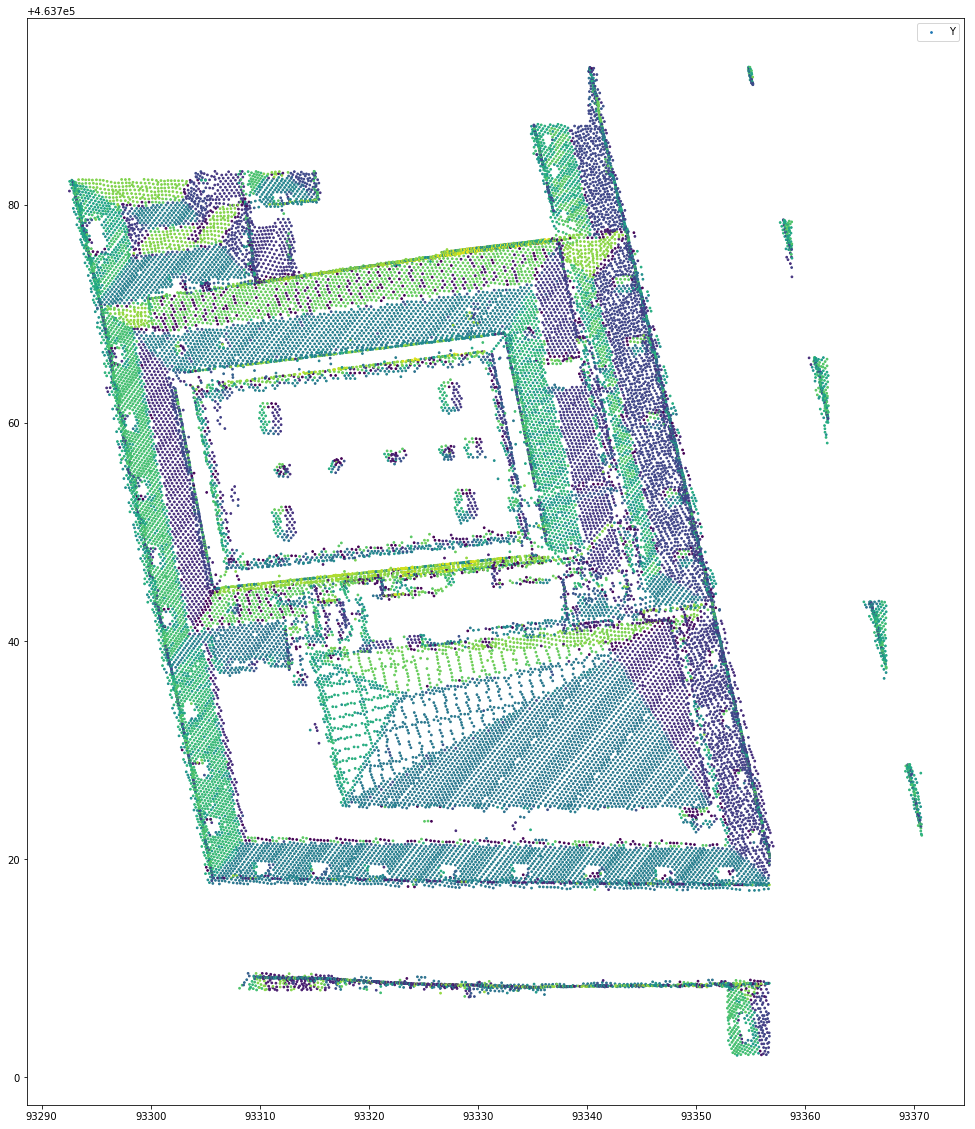

In [387]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect='equal')
ax.scatter(df['X'],df['Y'],c=df['Cluster'],s=3)
ax.legend(loc='best')

In [ ]:
from pyntcloud import PyntCloud
df2 = pd.DataFrame(df, columns=['X', 'Y', 'Z','Aspect','Slope','Intensity'])
df2.columns = ['x', 'y','z','aspect','slope','intensity']

#colors = (np.random.uniform(size=(len(df2), 3)) * 255).astype(np.uint8)
#df2[['red', 'blue', 'green']] = pd.DataFrame(colors, index=df2.index)

maxx = min(df2['x'])
df2['x'] = df2['x'] - maxx
maxy = min(df2['y'])
df2['y'] = df2['y'] - maxy
cloud = PyntCloud(df2)
#cloud.add_scalar_field("plane_fit",max_dist=10, max_iterations=100, n_inliers_to_stop=None)
cloud.plot(point_size=0.5, opacity=1, use_as_color='slope')
#cloud

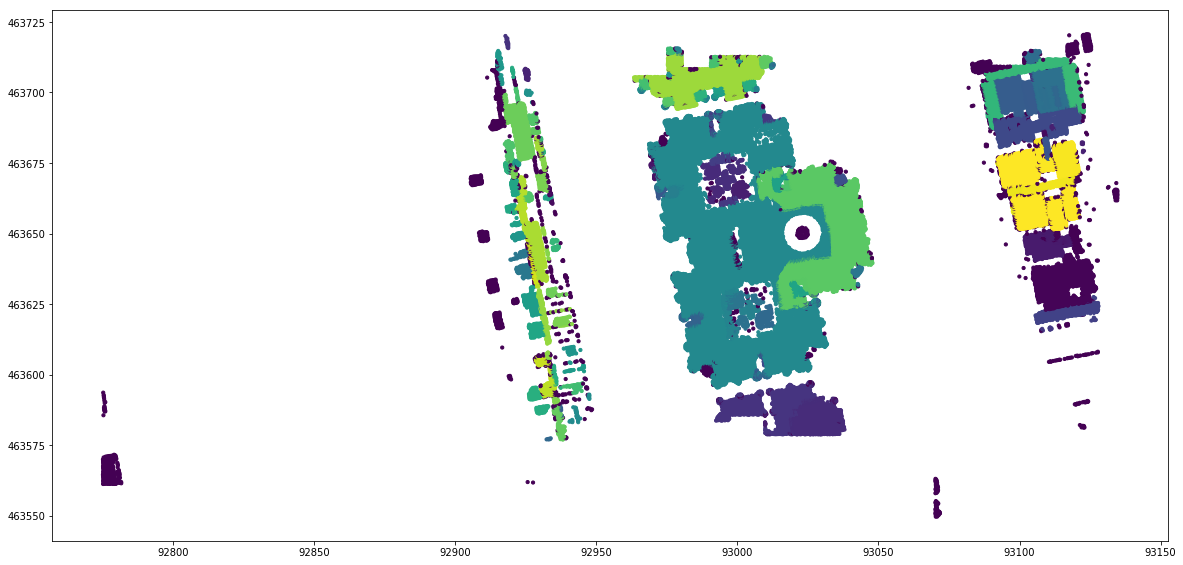

In [34]:
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(arr)
fig = plt.figure(figsize=(20,20))
ax = plt.axes(aspect='equal')
labels
ax.scatter(arr.T[0],arr.T[1],c=labels,
           vmin=np.percentile(labels,5),
           vmax=np.percentile(labels,95),
           cmap='viridis', s=10)